In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [30]:
#Import Data
churn=pd.read_csv('/Users/elineiman/Desktop/WGU Data Sets/D603/T2/churn_clean.csv')

<font size ='4'> Data Preperation </font>

<font size ='4'> D1: Data Preprocessesing </font>

The goal of preprocessing is to ensure the data is ready for the k-means model to use. K-means only accepts continuous numeric variables, which I will select in D2. Next, variables must be standardized to ensure the algorithm gives each input an equal chance to contribute to cluster formations.

I will also make sure the data is clean to put it in position to create meaningful clusters. I will check for missing and null values, and ensure the data types align with the churn data dictionary’s variable descriptions. I will also make sure the input variables are not correlated.


<font size ='4'> D2: Initial Dataset Variables </font>

Only continuous variables will suffice to pass the churn data into the k-means algorithm. Continuous variables can have any value in a range.

I will use:
- Age: Continuous variable
- Income: Continuous variable
- MonthlyCharge: Continuous variable


In [31]:
churn.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [32]:
#Selecting variables for analysis
churn1=churn[['Age','Income','MonthlyCharge']]
churn1.shape

(10000, 3)

<font size='4'> D3: Data Preprocessesing </font>

The churn1 data frame contains my analysis variables.

In [33]:
churn1.head()

,Age,Income,MonthlyCharge
0,68,28561.99,172.455519
1,27,21704.77,242.632554
2,50,9609.57,159.947583
3,48,18925.23,119.956840
4,83,40074.19,149.948316


I checked and confirmed there were no missing values in the data. I also confirmed the data types aligned with the information contained.

In [34]:
churn1.isnull().sum()

Age              0
Income           0
MonthlyCharge    0
dtype: int64

In [35]:
churn1.dtypes

Age                int64
Income           float64
MonthlyCharge    float64
dtype: object

Next, I standardized the data. I used the StandardScaler from sklearn to transform each variable into a mean of zero and a standard deviation of one.

In [36]:
scaler=StandardScaler()
scaler.fit(churn1)
scaled=scaler.transform(churn1)
churn_scaled=pd.DataFrame(scaled, columns=churn1.columns)

In [37]:
churn_scaled.head()

,Age,Income,MonthlyCharge
0,0.720925,-0.398778,-0.003943
1,-1.259957,-0.641954,1.630326
2,-0.148730,-1.070885,-0.295225
3,-0.245359,-0.740525,-1.226521
4,1.445638,0.009478,-0.528086


Finally, I analyzed the correlation between the standardized variables. Correlated variables impact k-means' ability to cluster each sample (Schwab, 2024). I created and analyzed a correlation table. Then, I created a heatmap to show the variables were uncorrelated and ready for the k-means model.

In [38]:
correlation=churn_scaled.corr()
correlation


,Age,Income,MonthlyCharge
Age,1.000000,-0.004091,0.010729
Income,-0.004091,1.000000,-0.003014
MonthlyCharge,0.010729,-0.003014,1.000000


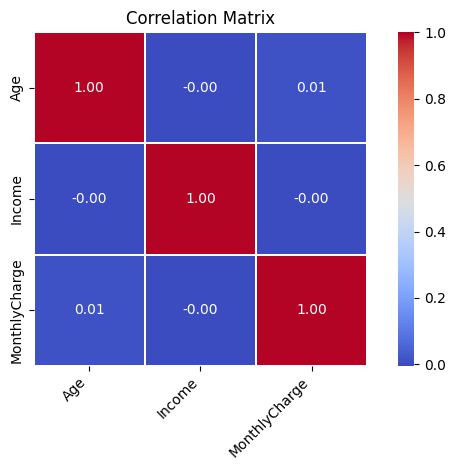

In [39]:
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<font size='4'> D4: Cleaned Dataset </font>

A copy of the cleaned dataset is provided with the submission

In [40]:
#churn_scaled.to_csv('churn_cleaned_dataset.csv')

<font size='4'> E: Data Analysis </font>

<font size='4'> E1: Output and Intermediate Calculations </font>

I analyzed inertia using the elbow method to determine the optimal number of clusters for the analysis. Inertia measures the spread of data within each cluster (Wilson). Lower inertia indicates closely related data, and a better cluster. The elbow method selects K where inertia values begin to level off. In this case, the optimal number of clusters is four. After four clusters, the inertia values continue to go down but do so at a diminishing rate. Therefore, the additional model complexity from including additional clusters is not worth the marginal decrease in inertia. 

In [41]:
#Inertia and silhouette for different K
ks=range(2,15)
inertias=[]
avg_silhouette= [] 
mapping={}

for k in ks:
	model=KMeans(n_clusters=k)		
	model.fit(churn_scaled)				
	inertias.append(model.inertia_)	
	avg_silhouette.append(silhouette_score(churn_scaled, model.labels_))	
	mapping[k] = model.inertia_



In [42]:
#Inertia values for each K
for key, val in mapping.items():
    print(f'{key} : {int(val)}')

2 : 23194
3 : 17474
4 : 13374
5 : 11500
6 : 10648
7 : 9670
8 : 8669
9 : 8019
10 : 7573
11 : 7030
12 : 6572
13 : 6267
14 : 6029


/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/4200232161.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(ks, inertias, '-o', color='deepskyblue', linestyle='--')


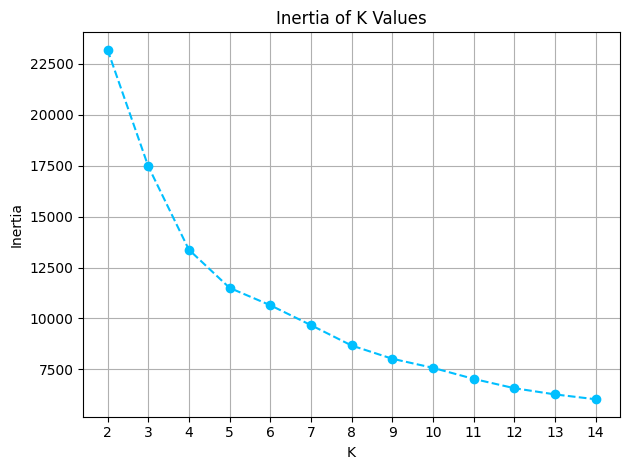

In [43]:
#Plot the inertias
plt.plot(ks, inertias, '-o', color='deepskyblue', linestyle='--')
plt.xlabel('K')
plt.xticks(ks)
plt.ylabel('Inertia')
plt.title('Inertia of K Values')
plt.grid()
plt.tight_layout()
plt.show();

To confirm the determination of four clusters, I plotted the silhouette values. The silhouette coefficient measures how close each data point is to its centroid, and how far it is from other centroids (Wilson). A higher value is better as it indicates a good fit between data and centroid. The highest silhouette value occurred at K=4, confirming four as the optimal number of clusters.

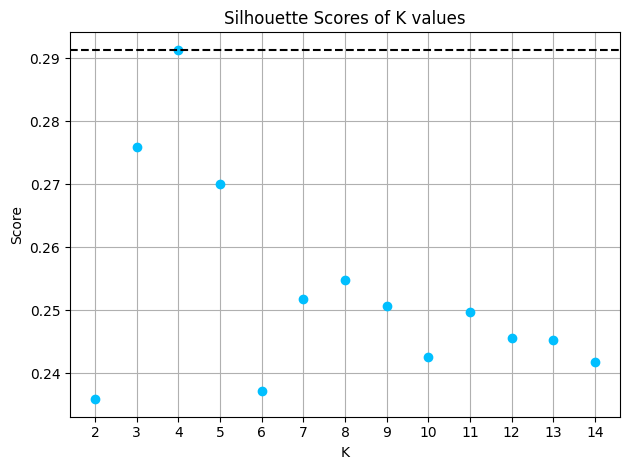

In [44]:
#Plot Silhouette scores
plt.plot(ks, avg_silhouette, 'o', color='deepskyblue')
plt.title('Silhouette Scores of K values')
plt.xlabel('K')
plt.xticks(ks)
plt.ylabel('Score')
plt.axhline(y=max(avg_silhouette), linestyle='--', color='black')
plt.grid()
plt.tight_layout()
plt.show();

I utilized the matplotlib reference page and the unsupervised machine learning Datacamp series from the course material to assist with creating the plots. I utilized the Geeks for Geeks elbow plot article to assist with inertia value code generation.

<font size='4'> F1: Quality of Clustering Technique </font>

First, I will initialize and fit the k-means model.

In [45]:
kmeans=KMeans(n_clusters=4, n_init=20, init='random', algorithm='elkan', random_state=13)
kmeans.fit(churn_scaled)


KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=20,
       random_state=13)

In [46]:
#Obtain the cluster labels
labels=kmeans.labels_
churn_scaled['Cluster'] = labels

In [47]:
#Display centroids and inertia
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 0.94259943 -0.33126321 -0.44465186]
 [-0.89466974 -0.32774665 -0.48739659]
 [-0.00693275  1.86216934 -0.14344271]
 [-0.02055546 -0.22945756  1.35869557]]
13374.510077494419


The following bar chart shows the customer segments the k-means model created.

/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/4160808455.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', 4)


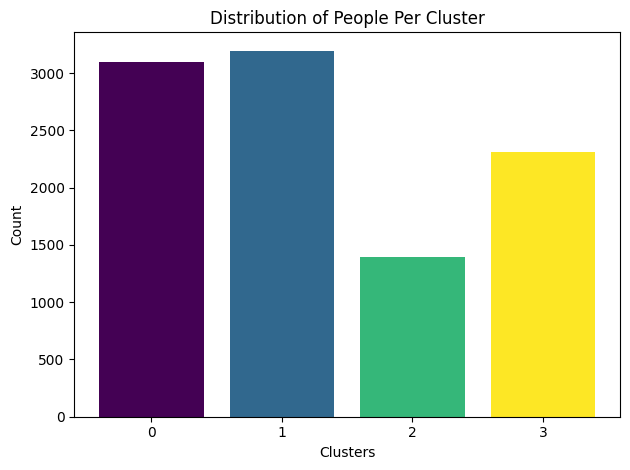

In [48]:
counts=churn_scaled.Cluster.value_counts()
sorted_counts=counts.sort_index()
viridis = cm.get_cmap('viridis', 4)
colors = [viridis(i) for i in range(4)] 

plt.bar(sorted_counts.index.astype(str), sorted_counts.values, color=colors)  
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Distribution of People Per Cluster')
plt.tight_layout()
plt.show()

I created two-dimensional visualizations of two features at a time. These plots show overlap between clusters, indicating high inertia. All three features contributed to cluster formation, so showing two features at a time removes critical explanatory information. This causes overlapping clusters that appear to be of poor quality. I included the two-dimensional plots because they are helpful to analyze how individual variables relate within clusters. I utilized Wasnik’s k-means article and the course textbook to assist with code generation.

/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/2070838959.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 10000
  plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


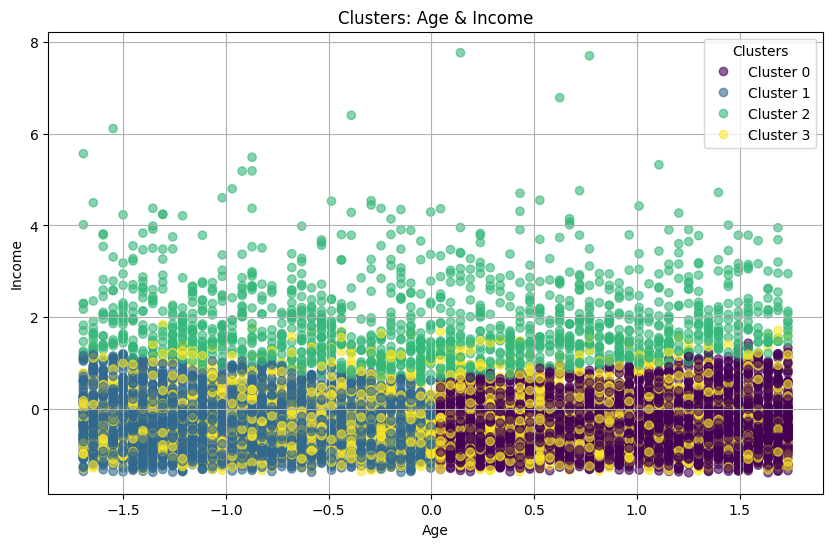

In [49]:
#Age and Income
plt.figure(figsize=(10, 6))
plt.scatter(churn_scaled['Age'], churn_scaled['Income'], c=churn_scaled['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters: Age & Income')
plt.grid()

#Legend
legend_labels = {i: f'Cluster {i}' for i in range(len(scatter.get_array()))}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


plt.show()


/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/3569101039.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 10000
  plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


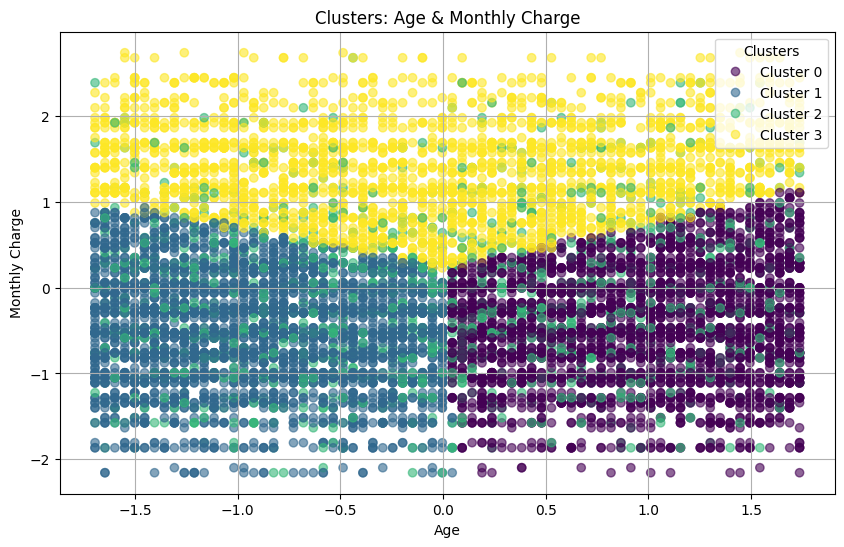

In [50]:
#Age and Monthly Charge
plt.figure(figsize=(10, 6))
plt.scatter(churn_scaled['Age'], churn_scaled['MonthlyCharge'], c=churn_scaled['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Monthly Charge')
plt.title('Clusters: Age & Monthly Charge')
plt.grid()

#Legend
legend_labels = {i: f'Cluster {i}' for i in range(len(scatter.get_array()))}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')

plt.show();


/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/445826024.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 10000
  plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


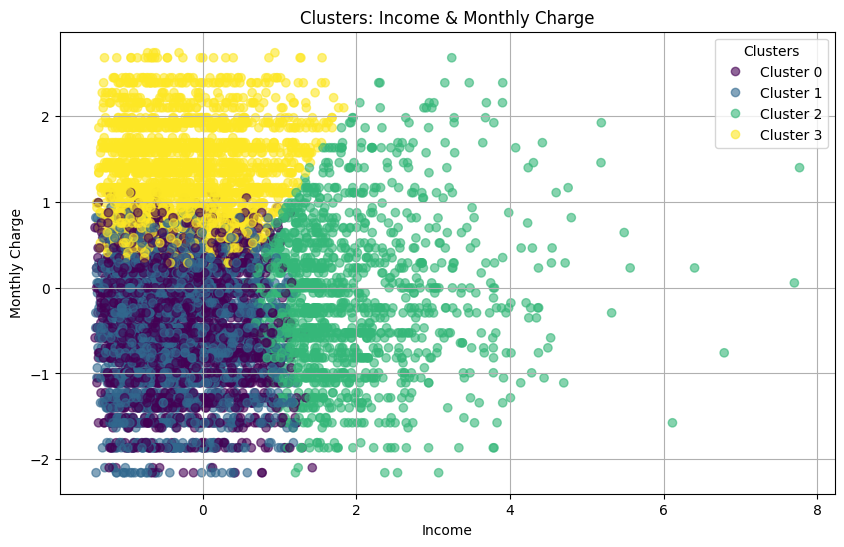

In [51]:
#Income and Monthly Charge
plt.figure(figsize=(10, 6))
plt.scatter(churn_scaled['Income'], churn_scaled['MonthlyCharge'], c=churn_scaled['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Income')
plt.ylabel('Monthly Charge')
plt.title('Clusters: Income & Monthly Charge')
plt.grid()

#Legend
legend_labels = {i: f'Cluster {i}' for i in range(len(scatter.get_array()))}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')

plt.show()

The three-dimensional plot shows how the churn data is grouped using all three features. There are four distinct clusters, indicating four customer segments. Cluster 2 has the most spread, as values vary across all three axes. This is the lowest-quality cluster. Cluster 3 has a wide range of data across the age variable. Clusters 0 and 1 are the tightest, and the best quality. I utilized Narendra’s K-means visualization article to assist with code generation.

/var/folders/d3/xxdfzd3n6lq70gynyy5khm800000gn/T/ipykernel_30738/1227119242.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 10000
  plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


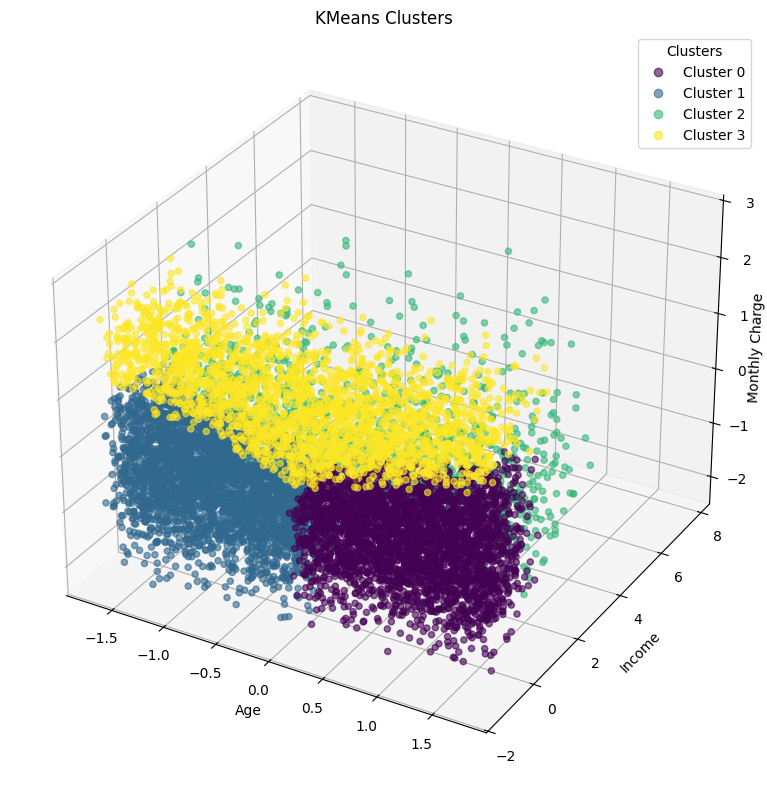

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(churn_scaled['Age'], churn_scaled['Income'], churn_scaled['MonthlyCharge'], 
                     c=churn_scaled['Cluster'], cmap='viridis', alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Monthly Charge', labelpad=-3)
ax.set_title('KMeans Clusters')

#Legend
legend_labels = {i: f'Cluster {i}' for i in range(len(scatter.get_array()))}
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title='Clusters')


plt.tight_layout()
plt.show()

The inertia value for the k-means clusters is 13,374.51. Given the size of the dataset, this indicates adequate quality clusters. In my first attempt (not included in this report), I included five variables to create the clusters. The inertia value for that model was 33,376. This indicates clusters that are significantly more spread out than my final model here.

Analyzing cluster size provides additional insight into their quality. Clusters with large variations in size indicate worse quality than an even spread. Clusters 1 and 0 are almost identical in size, reinforcing their quality. Cluster 3 is slightly smaller, and Cluster 2 is the smallest. The difference in size between clusters 1 and 2 indicates an imbalance. While evenly sized clusters are ideal, the variation in size across the 4 clusters is only moderate.


In [53]:
#Add labels to original churn data 
churn['Cluster']=labels
churn.Cluster.value_counts()

Cluster
1    3197
0    3097
3    2309
2    1397
Name: count, dtype: int64

<font size='4'> F2: Results and Implications </font>

Results:

The k-means model segmented the telecommunications customers into four distinct groups. Using age, income, and monthly charges, customers were sorted into the group that best described them. Clusters 0 and 1 are the highest quality, given their low spread. Cluster 3 had slightly more spread. Cluster 2 had the most spread, indicating variation between customers in this group. 
Adding the cluster labels onto the original churn data set provides insight into the makeup of each cluster. Cluster 0 is the oldest, with an average age of 72. Cluster 1 is the youngest, with an average age of 34. Cluster 2 is defined by high income. The average salary of these individuals is $92,330. Cluster 3 is defined by its monthly charges. They pay the most money for telecommunications services per month.


In [54]:
#Create data frame for analysis
analysis=churn[['Age', 'Income', 'MonthlyCharge', 'Tenure', 'Cluster', 'Bandwidth_GB_Year']]

In [59]:
#Data set avg v avg by cluster
print(analysis.mean().round(2))
print()
print(analysis.groupby('Cluster').mean().round(2))

Age                     53.08
Income               39806.93
MonthlyCharge          172.62
Tenure                  34.53
Cluster                  1.29
Bandwidth_GB_Year     3392.34
dtype: float64

           Age    Income  MonthlyCharge  Tenure  Bandwidth_GB_Year
Cluster                                                           
0        72.59  30461.63         153.54   34.86            3284.26
1        34.57  30562.40         151.68   34.08            3343.46
2        52.95  92330.21         166.43   34.65            3384.61
3        52.62  33363.49         230.97   34.63            3609.67


Implications:

Now that customers are segmented, the telecommunications company can implement relationship management strategies. They can develop a specific business plan for each cluster, and direct their resources accordingly. Before the segmentation, the company struggled to deploy resources efficiently because it only acknowledged a single custom base. I will go into specific detail about strategy implementation in section F4.
To depict customer characteristics discovered during clustering, I added the cluster labels to the original churn data. Then, I created box plots for age, income, and monthly charges. The distribution of customers across each variable of interest informs the business strategy I will recommend.


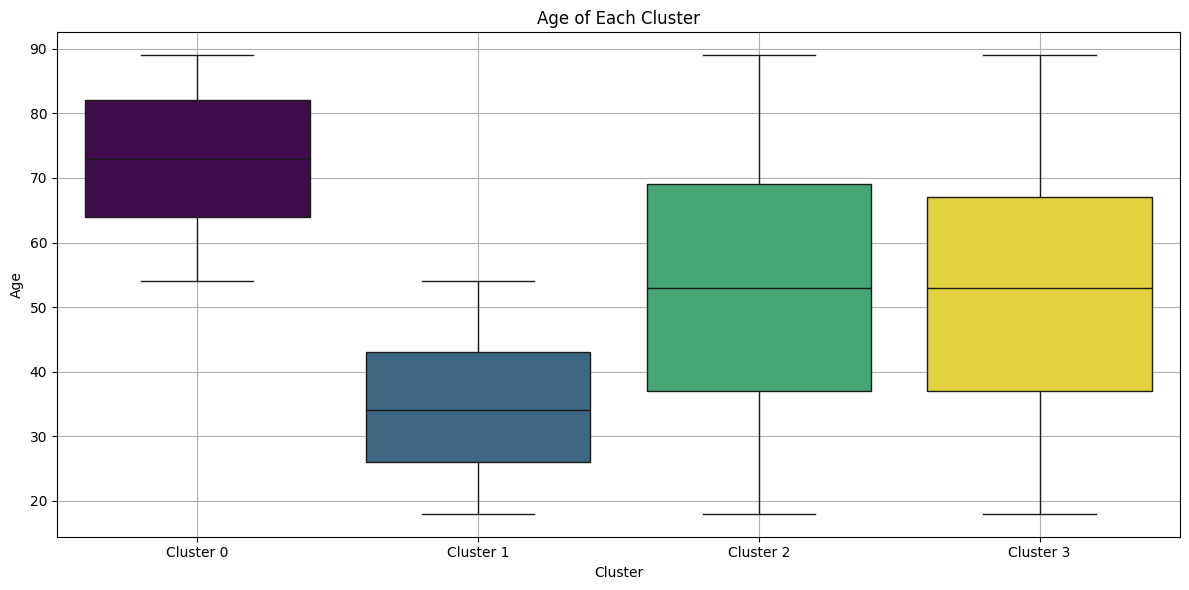

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Age of Each Cluster')
#plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid()
plt.tight_layout()
plt.show()

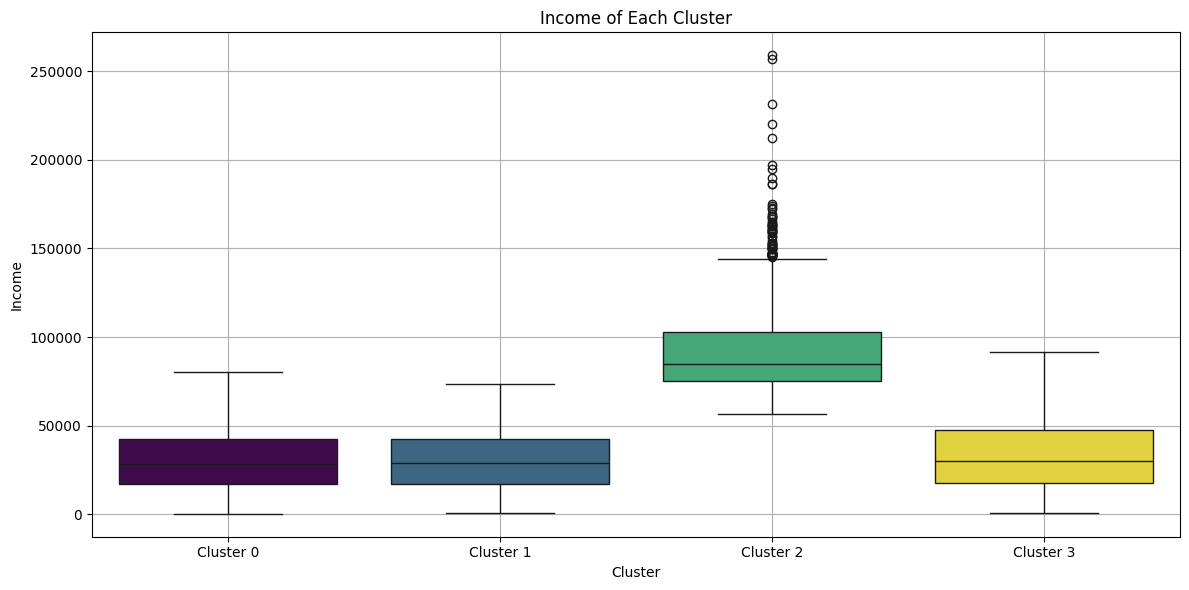

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Income', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Income of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.tight_layout()
plt.grid()
plt.show()

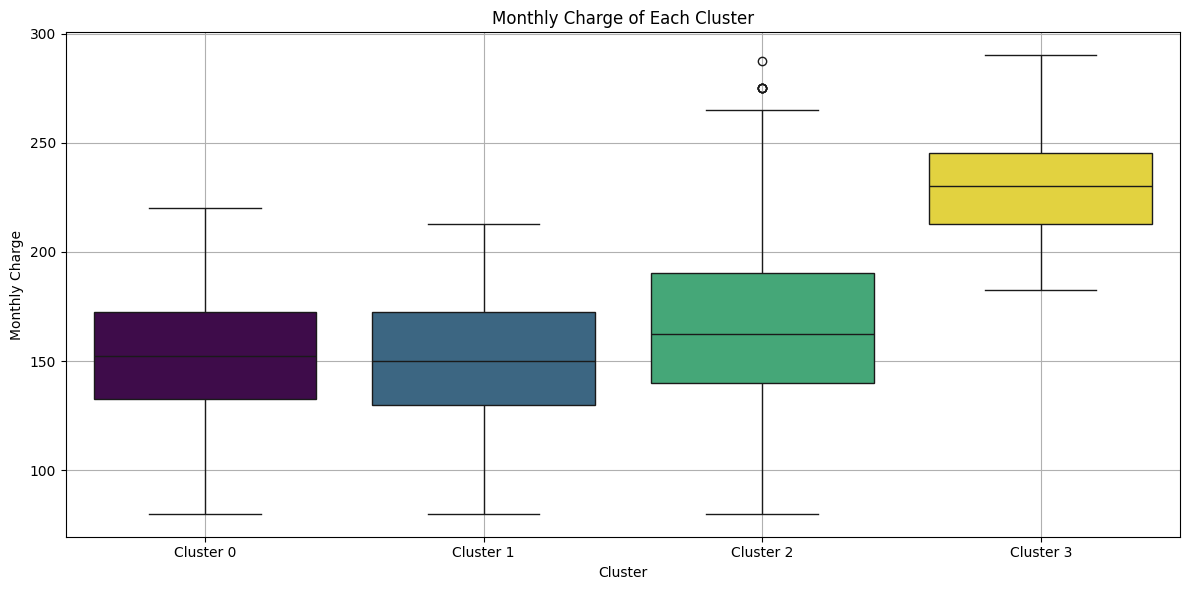

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='MonthlyCharge', data=analysis, hue='Cluster', palette='viridis', legend=False)
plt.title('Monthly Charge of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monthly Charge')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid()
plt.tight_layout()
plt.show()